In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Atributos

**Age**: age of the patient [years]

**Sex**: sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP**: resting blood pressure [mm Hg]

**Cholesterol**: serum cholesterol [mm/dl]

**FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: oldpeak = ST [Numeric value measured in depression]

**ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease**: output class [1: heart disease, 0: Normal]

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [5]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


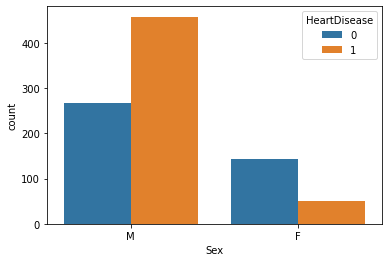

In [7]:
sns.countplot(x="Sex", data=df, hue="HeartDisease")

#### Percebe-se que, ao menos neste dataset, os homens tem mais doenças no coração do que as mulheres

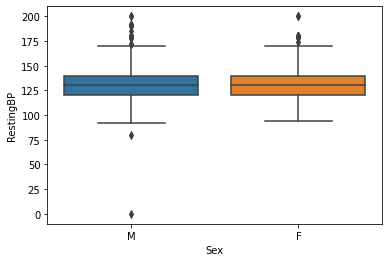

In [8]:
sns.boxplot(x="Sex", y="RestingBP", data=df)

#### Aparentemente, a pressão sanguínea não varia de acordo com o sexo

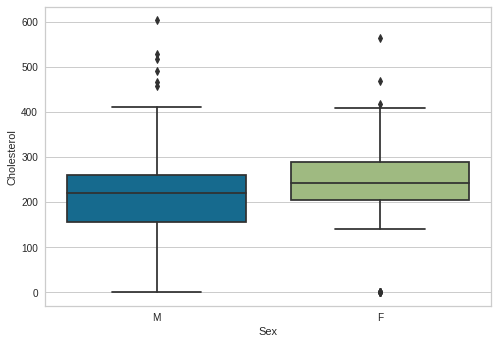

In [35]:
sns.boxplot(x="Sex", y="Cholesterol", data=df)

#### Aparentemente, a média do colesterol das mulheres é ligeiramente maior que a dos homens

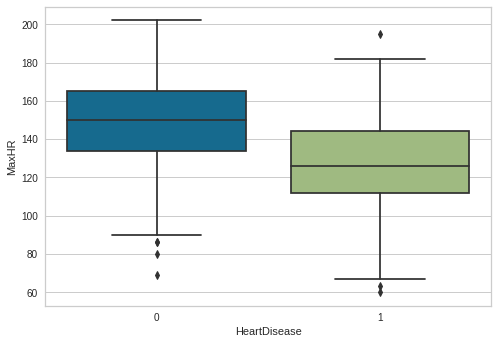

In [36]:
sns.boxplot(x="HeartDisease", y="MaxHR", data=df)

##### Pessoas com doenças no coração tendem a ter taxa máxima de batimentos menor

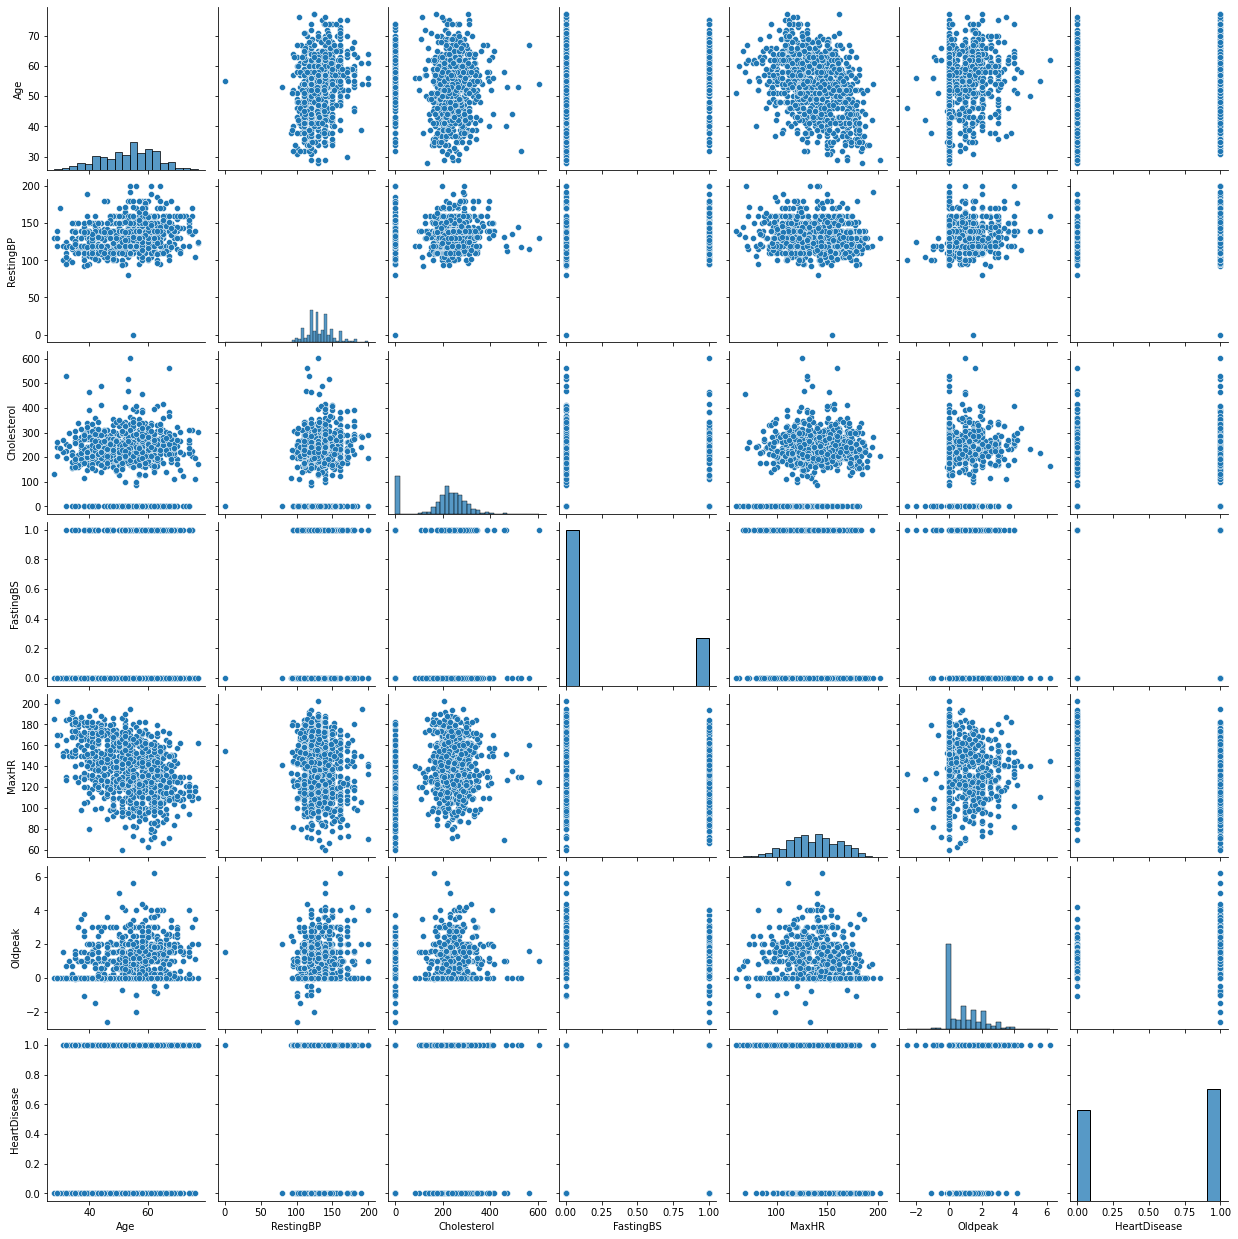

In [10]:
sns.pairplot(df)

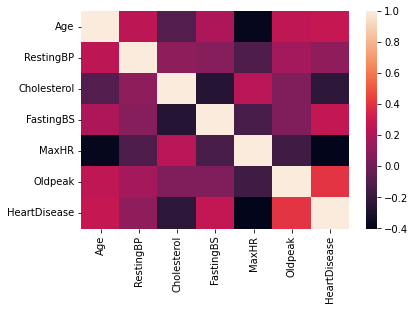

In [11]:
sns.heatmap(df.corr())

In [3]:
df.shape

(918, 12)

In [4]:
data = df.sample(frac=0.95, random_state=786)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Dados para o modelo: ' + str(data.shape))
print('Dados não vistos para predição: ' + str(data_unseen.shape))

Dados para o modelo: (872, 12)
Dados não vistos para predição: (46, 12)


In [5]:
from pycaret.classification import *

In [6]:
exp_clf101 = setup(data = data, target = 'HeartDisease', session_id=123)

,Description,Value
0,session_id,123
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(872, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8623,0.9247,0.8906,0.8652,0.8759,0.7210,0.7254,0.125
et,Extra Trees Classifier,0.8623,0.9153,0.8935,0.8648,0.8769,0.7205,0.7259,0.465
ridge,Ridge Classifier,0.8557,0.0000,0.8817,0.8612,0.8704,0.7076,0.7103,0.015
lda,Linear Discriminant Analysis,0.8557,0.9183,0.8817,0.8612,0.8704,0.7076,0.7103,0.018
lightgbm,Light Gradient Boosting Machine,0.8541,0.9263,0.8789,0.8621,0.8673,0.7050,0.7117,0.108
lr,Logistic Regression,0.8525,0.9176,0.8758,0.8606,0.8670,0.7013,0.7042,0.555
rf,Random Forest Classifier,0.8492,0.9271,0.8846,0.8503,0.8655,0.6936,0.6982,0.517
ada,Ada Boost Classifier,0.8475,0.8928,0.8580,0.8665,0.8603,0.6923,0.6962,0.118
nb,Naive Bayes,0.8443,0.9137,0.8640,0.8573,0.8592,0.6848,0.6882,0.017
dt,Decision Tree Classifier,0.7689,0.7665,0.7865,0.7984,0.7899,0.5322,0.5365,0.017


In [8]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [9]:
#Criando um modelo Gradient Boosting Classifier
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8689,0.9259,0.8824,0.8824,0.8824,0.7342,0.7342
1,0.9016,0.9564,0.9706,0.8684,0.9167,0.7976,0.8049
2,0.8197,0.8747,0.8824,0.8108,0.8451,0.6303,0.6335
3,0.9016,0.9651,0.9412,0.8889,0.9143,0.7991,0.8009
4,0.7705,0.9248,0.7353,0.8333,0.7812,0.5418,0.5465
5,0.8852,0.9063,0.9118,0.8857,0.8986,0.7665,0.7670
6,0.9016,0.9521,0.9706,0.8684,0.9167,0.7976,0.8049
7,0.8689,0.9009,0.8235,0.9333,0.8750,0.7382,0.7446
8,0.7869,0.9145,0.7879,0.8125,0.8000,0.5720,0.5724
9,0.9180,0.9264,1.0000,0.8684,0.9296,0.8327,0.8446


In [10]:
#Criando um modelo Extra Trees Classifier
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8525,0.9352,0.8235,0.9032,0.8615,0.7044,0.7078
1,0.8852,0.9341,0.9118,0.8857,0.8986,0.7665,0.7670
2,0.8361,0.8785,0.9118,0.8158,0.8611,0.6626,0.6687
3,0.9016,0.9112,0.9706,0.8684,0.9167,0.7976,0.8049
4,0.8525,0.9346,0.8529,0.8788,0.8657,0.7021,0.7025
5,0.8689,0.8862,0.9118,0.8611,0.8857,0.7322,0.7338
6,0.9016,0.9564,0.9412,0.8889,0.9143,0.7991,0.8009
7,0.8361,0.8949,0.8235,0.8750,0.8485,0.6703,0.6717
8,0.8197,0.8950,0.7879,0.8667,0.8254,0.6398,0.6429
9,0.8689,0.9264,1.0000,0.8049,0.8919,0.7301,0.7582


In [11]:
#Criando um modelo Ridge Classifier
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8525,0.0,0.8529,0.8788,0.8657,0.7021,0.7025
1,0.8361,0.0,0.8235,0.8750,0.8485,0.6703,0.6717
2,0.9016,0.0,0.9706,0.8684,0.9167,0.7976,0.8049
3,0.8852,0.0,0.9706,0.8462,0.9041,0.7629,0.7741
4,0.8033,0.0,0.7941,0.8438,0.8182,0.6043,0.6056
5,0.8525,0.0,0.8824,0.8571,0.8696,0.6998,0.7002
6,0.8689,0.0,0.8824,0.8824,0.8824,0.7342,0.7342
7,0.8361,0.0,0.8529,0.8529,0.8529,0.6678,0.6678
8,0.8033,0.0,0.8182,0.8182,0.8182,0.6039,0.6039
9,0.9180,0.0,0.9697,0.8889,0.9275,0.8336,0.8378


# Fine-tunning nos modelos

In [12]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8361,0.9292,0.8824,0.8333,0.8571,0.6652,0.6667
1,0.8852,0.9564,0.9118,0.8857,0.8986,0.7665,0.7670
2,0.8361,0.9063,0.9706,0.7857,0.8684,0.6573,0.6835
3,0.9180,0.9684,1.0000,0.8718,0.9315,0.8306,0.8428
4,0.8361,0.9314,0.8235,0.8750,0.8485,0.6703,0.6717
5,0.8852,0.8856,0.9118,0.8857,0.8986,0.7665,0.7670
6,0.9180,0.9673,0.9706,0.8919,0.9296,0.8320,0.8362
7,0.8689,0.9020,0.8824,0.8824,0.8824,0.7342,0.7342
8,0.8197,0.8994,0.8182,0.8438,0.8308,0.6379,0.6382
9,0.9016,0.9556,1.0000,0.8462,0.9167,0.7987,0.8154


In [13]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8361,0.9270,0.8529,0.8529,0.8529,0.6678,0.6678
1,0.9016,0.9521,0.9412,0.8889,0.9143,0.7991,0.8009
2,0.9016,0.8954,0.9706,0.8684,0.9167,0.7976,0.8049
3,0.8852,0.9303,0.9706,0.8462,0.9041,0.7629,0.7741
4,0.8197,0.9107,0.7941,0.8710,0.8308,0.6387,0.6418
5,0.8525,0.8813,0.8824,0.8571,0.8696,0.6998,0.7002
6,0.9016,0.9532,0.9118,0.9118,0.9118,0.8007,0.8007
7,0.8197,0.9009,0.8235,0.8485,0.8358,0.6359,0.6363
8,0.8033,0.8745,0.7879,0.8387,0.8125,0.6060,0.6073
9,0.9344,0.9632,0.9697,0.9143,0.9412,0.8672,0.8692


In [14]:
tuned_ridge = tune_model(ridge)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8689,0.0,0.8824,0.8824,0.8824,0.7342,0.7342
1,0.8361,0.0,0.8235,0.8750,0.8485,0.6703,0.6717
2,0.9016,0.0,0.9706,0.8684,0.9167,0.7976,0.8049
3,0.8852,0.0,0.9706,0.8462,0.9041,0.7629,0.7741
4,0.8033,0.0,0.7941,0.8438,0.8182,0.6043,0.6056
5,0.8852,0.0,0.9118,0.8857,0.8986,0.7665,0.7670
6,0.8689,0.0,0.8824,0.8824,0.8824,0.7342,0.7342
7,0.8197,0.0,0.8235,0.8485,0.8358,0.6359,0.6363
8,0.8033,0.0,0.8182,0.8182,0.8182,0.6039,0.6039
9,0.9180,0.0,0.9697,0.8889,0.9275,0.8336,0.8378


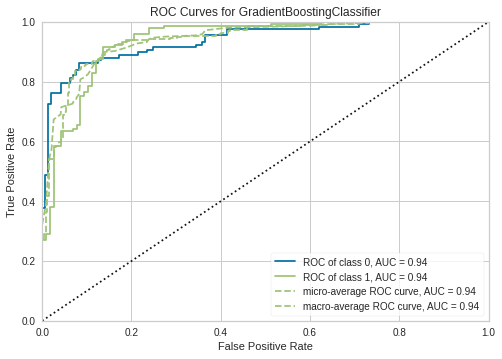

In [15]:
plot_model(tuned_gbc, plot = 'auc')

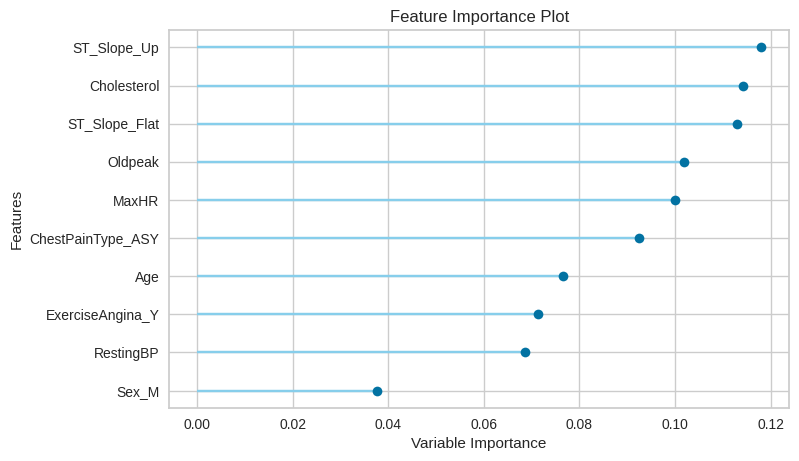

In [16]:
plot_model(tuned_gbc, plot='feature')

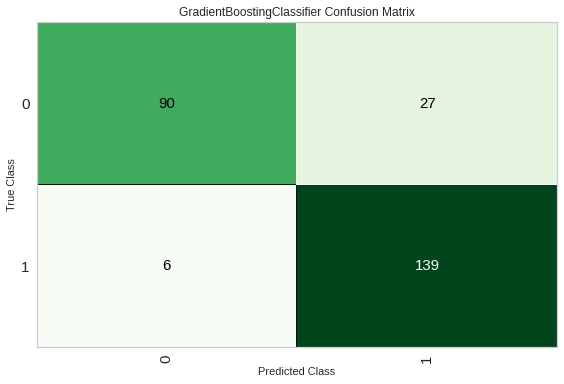

In [17]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [20]:
evaluate_model(tuned_gbc)

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.01
loss,deviance
max_depth,7
max_features,sqrt
max_leaf_nodes,None
min_impurity_decrease,0.05
min_impurity_split,None


In [21]:
predict_model(tuned_gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.874,0.9391,0.9586,0.8373,0.8939,0.7407,0.751


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease,Label,Score
0,69.0,122.0,216.0,84.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,0.8327
1,28.0,130.0,132.0,185.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8211
2,37.0,130.0,211.0,142.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8577
3,46.0,101.0,197.0,156.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.7662
4,51.0,130.0,256.0,149.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,53.0,120.0,181.0,132.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.8539
258,62.0,158.0,210.0,112.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1,1,0.8265
259,65.0,134.0,0.0,112.0,1.1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1,0.8727
260,62.0,138.0,294.0,106.0,1.9,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.7489


In [22]:
final_gbc = finalize_model(tuned_gbc)

In [23]:
#Parâmetros do modelo para o deploy
print(final_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [24]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Label,Score
0,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0,0,0.8252
1,36,M,NAP,112,340,0,Normal,184,N,1.0,Flat,0,0,0.5175
2,39,M,NAP,160,147,1,Normal,160,N,0.0,Up,0,0,0.7691
3,46,M,ASY,110,240,0,ST,140,N,0.0,Up,0,0,0.7442
4,56,M,ASY,170,388,0,ST,122,Y,2.0,Flat,1,1,0.8572


In [25]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['HeartDisease'], unseen_predictions['Label'], metric = 'Accuracy')

0.8913

##### Percebe-se que o modelo final se comportou muito bem para dados nunca vistos, alcançando uma acurácia de 89%

# Fazendo o deploy do modelo

In [37]:
save_model(final_gbc,'Final GBC Model 06Out2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='HeartDisease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                             learning_rate=0.01, loss='deviance',
                                             max_depth=7, max_features='sqrt',
                                             max_leaf_nodes=None,
        